### Pandas Task

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import iqr

# 1. 데이터 확인
happiness_df = pd.read_csv('./datasets/happiness_report_2023.csv')
display(happiness_df)

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Finland,Western Europe,7.804,1.888,1.585,0.535,0.772,0.126,0.535
1,Denmark,Western Europe,7.586,1.949,1.548,0.537,0.734,0.208,0.525
2,Iceland,Western Europe,7.530,1.926,1.620,0.559,0.738,0.250,0.187
3,Israel,Middle East and North Africa,7.473,1.833,1.521,0.577,0.569,0.124,0.158
4,Netherlands,Western Europe,7.403,1.942,1.488,0.545,0.672,0.251,0.394
...,...,...,...,...,...,...,...,...,...
132,Congo (Kinshasa),Sub-Saharan Africa,3.207,0.531,0.784,0.105,0.375,0.183,0.068
133,Zimbabwe,Sub-Saharan Africa,3.204,0.758,0.881,0.069,0.363,0.112,0.117
134,Sierra Leone,Sub-Saharan Africa,3.138,0.670,0.540,0.092,0.371,0.193,0.051
135,Lebanon,Middle East and North Africa,2.392,1.417,0.476,0.398,0.123,0.061,0.027


In [2]:
# 상대적으로 행복지수가 가장 높은 10개의 국가의 정보 출력
display(happiness_df.head(10))

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Finland,Western Europe,7.804,1.888,1.585,0.535,0.772,0.126,0.535
1,Denmark,Western Europe,7.586,1.949,1.548,0.537,0.734,0.208,0.525
2,Iceland,Western Europe,7.530,1.926,1.620,0.559,0.738,0.250,0.187
3,Israel,Middle East and North Africa,7.473,1.833,1.521,0.577,0.569,0.124,0.158
4,Netherlands,Western Europe,7.403,1.942,1.488,0.545,0.672,0.251,0.394
5,Sweden,Western Europe,7.395,1.921,1.510,0.562,0.754,0.225,0.520
6,Norway,Western Europe,7.315,1.994,1.521,0.544,0.752,0.212,0.463
7,Switzerland,Western Europe,7.240,2.022,1.463,0.582,0.678,0.151,0.475
8,Luxembourg,Western Europe,7.228,2.200,1.357,0.549,0.710,0.149,0.418
9,New Zealand,North America and ANZ,7.123,1.842,1.544,0.513,0.672,0.230,0.471


In [3]:
# 상대적으로 행복지수가 가장 낮은 10개의 국가의 정보 출력
display(happiness_df.tail(10))

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
127,Zambia,Sub-Saharan Africa,3.982,0.914,0.890,0.095,0.545,0.189,0.080
128,Tanzania,Sub-Saharan Africa,3.694,0.836,0.787,0.214,0.607,0.234,0.269
129,Comoros,Sub-Saharan Africa,3.545,0.914,0.327,0.215,0.117,0.129,0.145
130,Malawi,Sub-Saharan Africa,3.495,0.637,0.479,0.189,0.490,0.139,0.129
131,Botswana,Sub-Saharan Africa,3.435,1.471,1.041,0.087,0.480,0.021,0.071
132,Congo (Kinshasa),Sub-Saharan Africa,3.207,0.531,0.784,0.105,0.375,0.183,0.068
133,Zimbabwe,Sub-Saharan Africa,3.204,0.758,0.881,0.069,0.363,0.112,0.117
134,Sierra Leone,Sub-Saharan Africa,3.138,0.670,0.540,0.092,0.371,0.193,0.051
135,Lebanon,Middle East and North Africa,2.392,1.417,0.476,0.398,0.123,0.061,0.027
136,Afghanistan,South Asia,1.859,0.645,0.000,0.087,0.000,0.093,0.059


In [4]:
# 행복지수 조사 DataFrame의 각 feature 별 평균, 표준편차, 최소/최대값, 사분위수 표시
happiness_df.describe().T

,count,mean,std,min,25%,50%,75%,max
happiness_score,137.0,5.539796,1.139929,1.859,4.7240,5.6840,6.3340,7.804
gdp_per_capita,137.0,1.406985,0.432963,0.000,1.0990,1.4490,1.7980,2.200
social_support,137.0,1.156212,0.326322,0.000,0.9620,1.2270,1.4010,1.620
healthy_life_expectancy,136.0,0.366176,0.156691,0.000,0.2485,0.3895,0.4875,0.702
freedom_to_make_life_choices,137.0,0.540000,0.149501,0.000,0.4550,0.5570,0.6560,0.772
generosity,137.0,0.148474,0.076053,0.000,0.0970,0.1370,0.1990,0.422
perceptions_of_corruption,137.0,0.145898,0.126723,0.000,0.0600,0.1110,0.1870,0.561


In [5]:
# 각 feature 별 결손 데이터 수 확인
happiness_df.isna().sum()

country                         0
region                          0
happiness_score                 0
gdp_per_capita                  0
social_support                  0
healthy_life_expectancy         1
freedom_to_make_life_choices    0
generosity                      0
perceptions_of_corruption       0
dtype: int64

In [6]:
# 결손이 발생한 행 확인 - 98번 인덱스의 healthy_life_expectancy에 데이터 없음
happiness_df[happiness_df['healthy_life_expectancy'].isna()]

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
98,State of Palestine,Middle East and North Africa,4.908,1.144,1.309,NaN,0.416,0.065,0.067


In [7]:
# 결손이 발생한 행을 평균값(0.366176)으로 대체 후, 결손 여부 재확인
happiness_df['healthy_life_expectancy'] = happiness_df['healthy_life_expectancy'].fillna(0.366176)
happiness_df.isna().sum()

country                         0
region                          0
happiness_score                 0
gdp_per_capita                  0
social_support                  0
healthy_life_expectancy         0
freedom_to_make_life_choices    0
generosity                      0
perceptions_of_corruption       0
dtype: int64

In [8]:
# 컬럼명 확인 - 결과값은 Index 타입
print(happiness_df.columns)

# arange에서 쓰는 형식으로 인덱스 확인 - 결과값은 RangeIndex 타입
print(happiness_df.index)

# 1차원 배열 형식으로 인덱스 번호 확인 - 결과 값은 배열 타입
print(happiness_df.index.values)

Index(['country', 'region', 'happiness_score', 'gdp_per_capita',
       'social_support', 'healthy_life_expectancy',
       'freedom_to_make_life_choices', 'generosity',
       'perceptions_of_corruption'],
      dtype='object')
RangeIndex(start=0, stop=137, step=1)
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136]


In [9]:
# 2023년 행복지수 조사 DataFrame의 전체 정보 출력
# 출력 정보: DataFrame의 type, 인덱스 범위(RangeIndex), DataFrame 내 컬럼들의 dtype과 그의 개수, 메모리 사용량
# 출력되는 DataFrame 내 정보: 인덱스 번호(0번부터), 컬럼명, null값이 아닌 칸의 개수, dtype
happiness_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       137 non-null    object 
 1   region                        137 non-null    object 
 2   happiness_score               137 non-null    float64
 3   gdp_per_capita                137 non-null    float64
 4   social_support                137 non-null    float64
 5   healthy_life_expectancy       137 non-null    float64
 6   freedom_to_make_life_choices  137 non-null    float64
 7   generosity                    137 non-null    float64
 8   perceptions_of_corruption     137 non-null    float64
dtypes: float64(7), object(2)
memory usage: 9.8+ KB


In [10]:
# 각 컬럼의 dtype
happiness_df.dtypes

country                          object
region                           object
happiness_score                 float64
gdp_per_capita                  float64
social_support                  float64
healthy_life_expectancy         float64
freedom_to_make_life_choices    float64
generosity                      float64
perceptions_of_corruption       float64
dtype: object

In [11]:
# 사분위수와 iqr을 이용한 행복지수 정상치 도출
happinessQ1 = happiness_df.describe().T.loc['happiness_score', '25%']
happinessQ3 = happiness_df.describe().T.loc['happiness_score', '75%']

iqr_value = iqr(happiness_df.happiness_score)

print(f'행복지수 하위 25% 수치: {happinessQ1}')
print(f'행복지수 상위 25% 수치: {happinessQ3}')

print(f'iqr Value: {iqr_value}')

lower_bound = happinessQ1 - 1.5 * iqr_value
upper_bound = happinessQ3 + 1.5 * iqr_value

print(f'\n정상치 범위: {lower_bound} ~ {upper_bound}')

행복지수 하위 25% 수치: 4.724
행복지수 상위 25% 수치: 6.334
iqr Value: 1.6099999999999994

정상치 범위: 2.309000000000001 ~ 8.748999999999999


In [12]:
# 이상치가 발생한 행 조회 - 아프가니스탄의 행복지수에 이상치 존재
abnomal_row = happiness_df[(happiness_df['happiness_score'] > upper_bound) | (happiness_df['happiness_score'] < lower_bound)]

display(abnomal_row)

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
136,Afghanistan,South Asia,1.859,0.645,0.0,0.087,0.0,0.093,0.059


In [13]:
# 이상치 제거 후 인덱스 초기화
happiness_df = happiness_df.drop(index=[136], axis=0)
happiness_df.reset_index(drop=True, inplace=True)

display(happiness_df)

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Finland,Western Europe,7.804,1.888,1.585,0.535,0.772,0.126,0.535
1,Denmark,Western Europe,7.586,1.949,1.548,0.537,0.734,0.208,0.525
2,Iceland,Western Europe,7.530,1.926,1.620,0.559,0.738,0.250,0.187
3,Israel,Middle East and North Africa,7.473,1.833,1.521,0.577,0.569,0.124,0.158
4,Netherlands,Western Europe,7.403,1.942,1.488,0.545,0.672,0.251,0.394
...,...,...,...,...,...,...,...,...,...
131,Botswana,Sub-Saharan Africa,3.435,1.471,1.041,0.087,0.480,0.021,0.071
132,Congo (Kinshasa),Sub-Saharan Africa,3.207,0.531,0.784,0.105,0.375,0.183,0.068
133,Zimbabwe,Sub-Saharan Africa,3.204,0.758,0.881,0.069,0.363,0.112,0.117
134,Sierra Leone,Sub-Saharan Africa,3.138,0.670,0.540,0.092,0.371,0.193,0.051


### 데이터 분석 전처리
- 데이터를 분석하던 도중, healthy_life_expectancy(건강한 삶에 대한 기대치) feature에  
  결손이 발생한 곳이 있다는 사실을 확인했습니다.
- 따라서, 위의 결손 데이터를 건강한 삶에 대한 기대치의 평균값인 0.366176으로 대체한 후에 데이터 분석을 실행했습니다.
<br/><br/>
- 이 아래에서는, groupby()를 사용해서 여러 행들을 공통되는 region(지역)으로 묶은 다음,  
  각 지역 별 행복지수의 평균을 산출합니다.
- 그 후, 각 지역 별 나머지 feature의 평균 값과 비교하면서 행복지수와의 연관성을 조사해보겠습니다.

In [14]:
# 지역 별 평균 행복지수 DataFrame
mean_happiness_df = happiness_df.groupby('region').mean('happiness_score').reset_index()
# display(mean_happiness_df)

# 위 DataFrame에서 지역, 평균 행복지수 외 1가지 정보를 추가로 출력하면서 행복지수와의 비례정도 조사
# GDP - 대체로 비례하나, 정비례는 아님
display(mean_happiness_df[['region', 'happiness_score', 'gdp_per_capita']])

,region,happiness_score,gdp_per_capita
0,Central and Eastern Europe,5.967091,1.618364
1,Commonwealth of Independent States,5.828250,1.231000
2,East Asia,5.930167,1.734667
3,Latin America and Caribbean,5.966053,1.349632
4,Middle East and North Africa,5.102143,1.514571
5,North America and ANZ,7.018250,1.900500
6,South Asia,4.535000,1.154800
7,Southeast Asia,5.431222,1.400889
8,Sub-Saharan Africa,4.382485,0.912848
9,Western Europe,6.894350,1.911050


<Axes: title={'center': 'Mean GDP'}, xlabel='region', ylabel='GDP'>

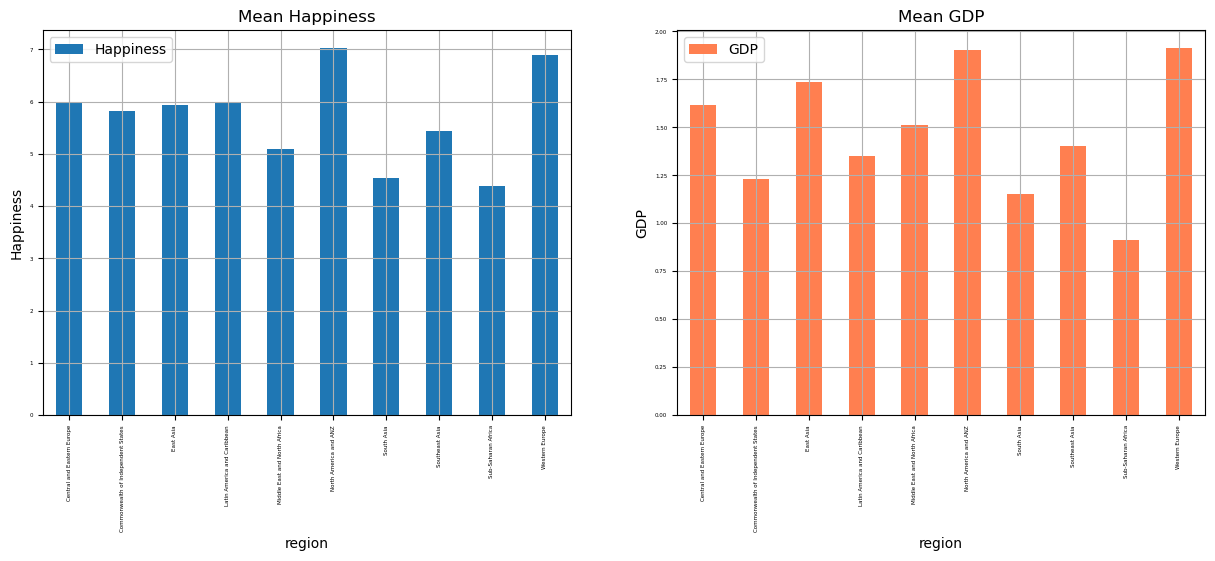

In [15]:
# 행복지수 - GDP 데이터 비교 시각화
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

mean_happiness_df.plot(title='Mean Happiness', x='region', y='happiness_score', \
                       fontsize=4, grid=True, ax=axes[0], ylabel="Happiness", label="Happiness", kind="bar")

mean_happiness_df.plot(title='Mean GDP', x='region', y='gdp_per_capita', \
                       fontsize=4, grid=True, ax=axes[1], ylabel="GDP", label="GDP", color="coral", kind="bar")

In [16]:
# 개개인에 대한 사회적 지지도 - 정비례에 가장 가까움
display(mean_happiness_df[['region', 'happiness_score', 'social_support']])

,region,happiness_score,social_support
0,Central and Eastern Europe,5.967091,1.361545
1,Commonwealth of Independent States,5.828250,1.381250
2,East Asia,5.930167,1.316667
3,Latin America and Caribbean,5.966053,1.260000
4,Middle East and North Africa,5.102143,1.081214
5,North America and ANZ,7.018250,1.496250
6,South Asia,4.535000,0.819000
7,Southeast Asia,5.431222,1.149333
8,Sub-Saharan Africa,4.382485,0.812788
9,Western Europe,6.894350,1.434950


<Axes: title={'center': 'Mean Social Support'}, xlabel='region', ylabel='Social Support'>

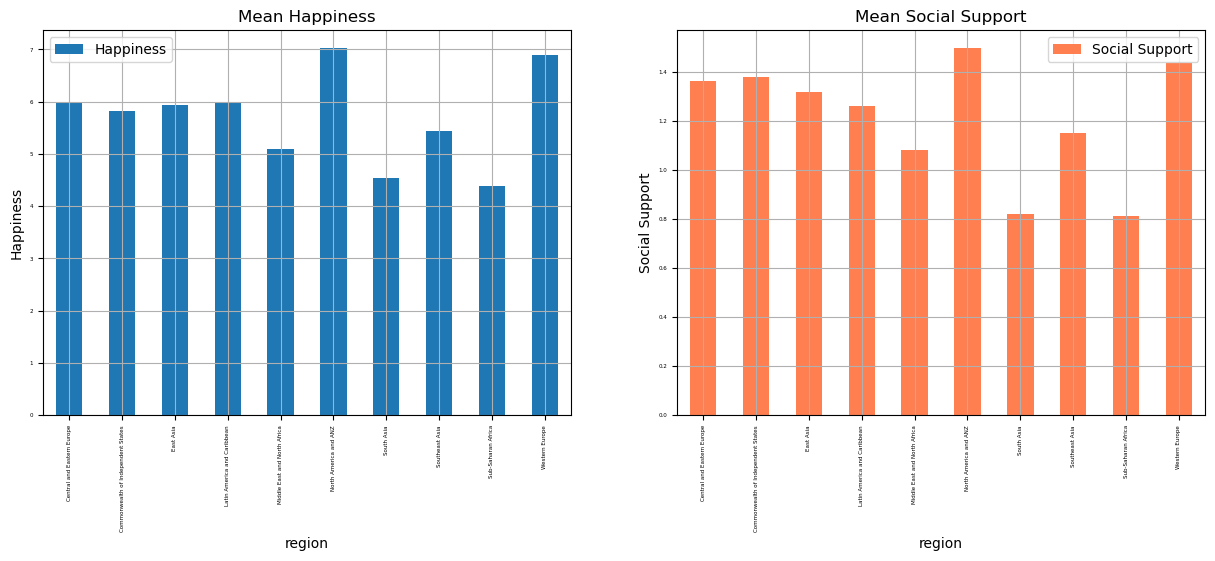

In [17]:
# 행복지수 - 사회적 지지도 데이터 비교 시각화
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

mean_happiness_df.plot(title='Mean Happiness', x='region', y='happiness_score', \
                       fontsize=4, grid=True, ax=axes[0], ylabel="Happiness", label="Happiness", kind="bar")

mean_happiness_df.plot(title='Mean Social Support', x='region', y='social_support', \
                       fontsize=4, grid=True, ax=axes[1], ylabel="Social Support", \
                       label="Social Support", color="coral", kind="bar")

In [18]:
# 건강한 삶에 대한 기대 정도 - 비례도 낮음. 행복지수와의 연관성이 낮은 것으로 보임.
display(mean_happiness_df[['region', 'happiness_score', 'healthy_life_expectancy']])

,region,happiness_score,healthy_life_expectancy
0,Central and Eastern Europe,5.967091,0.430545
1,Commonwealth of Independent States,5.828250,0.368000
2,East Asia,5.930167,0.521833
3,Latin America and Caribbean,5.966053,0.412158
4,Middle East and North Africa,5.102143,0.401155
5,North America and ANZ,7.018250,0.494000
6,South Asia,4.535000,0.294400
7,Southeast Asia,5.431222,0.360333
8,Sub-Saharan Africa,4.382485,0.148788
9,Western Europe,6.894350,0.547800


<Axes: title={'center': 'Mean Healthy Life Extendancy'}, xlabel='region', ylabel='Healthy Life Extendancy'>

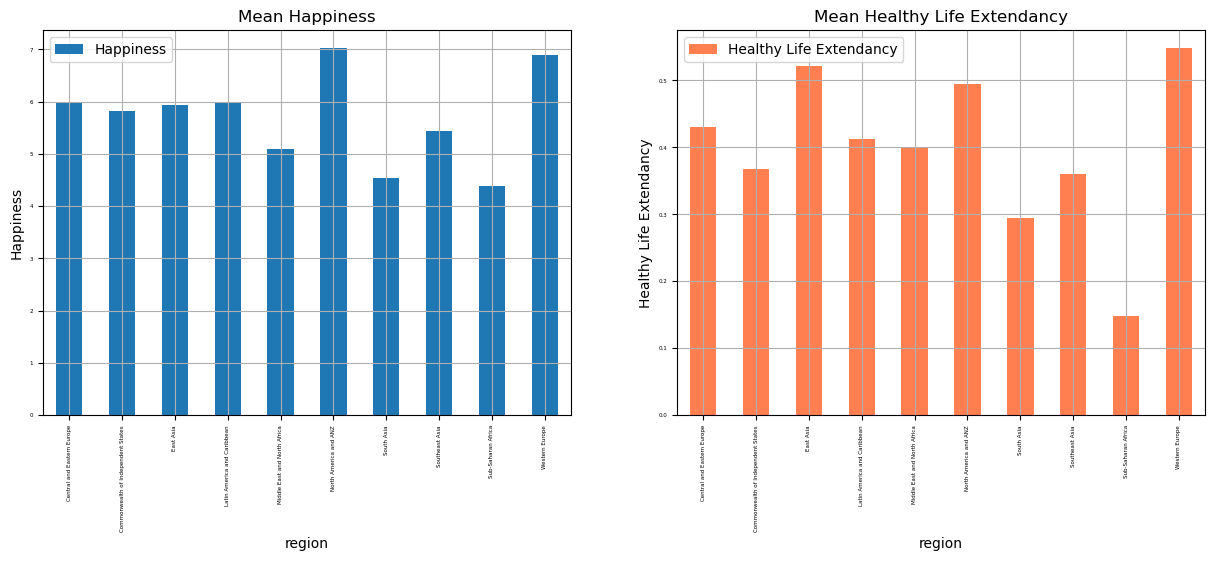

In [19]:
# 행복지수 - 건강한 삶에 대한 기대 정도 데이터 비교 시각화
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

mean_happiness_df.plot(title='Mean Happiness', x='region', y='happiness_score', \
                       fontsize=4, grid=True, ax=axes[0], ylabel="Happiness", label="Happiness", kind="bar")

mean_happiness_df.plot(title='Mean Healthy Life Extendancy', x='region', y='healthy_life_expectancy', \
                       fontsize=4, grid=True, ax=axes[1], ylabel="Healthy Life Extendancy", \
                       label="Healthy Life Extendancy", color="coral", kind="bar")

In [20]:
# 삶의 선택에 있어서의 자유도 - 비례도 낮음. 행복지수와의 연관성이 낮은 것으로 보임.
display(mean_happiness_df[['region', 'happiness_score', 'freedom_to_make_life_choices']])

,region,happiness_score,freedom_to_make_life_choices
0,Central and Eastern Europe,5.967091,0.566227
1,Commonwealth of Independent States,5.828250,0.675500
2,East Asia,5.930167,0.510333
3,Latin America and Caribbean,5.966053,0.605895
4,Middle East and North Africa,5.102143,0.433929
5,North America and ANZ,7.018250,0.640500
6,South Asia,4.535000,0.583800
7,Southeast Asia,5.431222,0.667111
8,Sub-Saharan Africa,4.382485,0.428394
9,Western Europe,6.894350,0.627500


<Axes: title={'center': 'Mean Freedom to Make Life Choices'}, xlabel='region', ylabel='Freedom to Make Life Choices'>

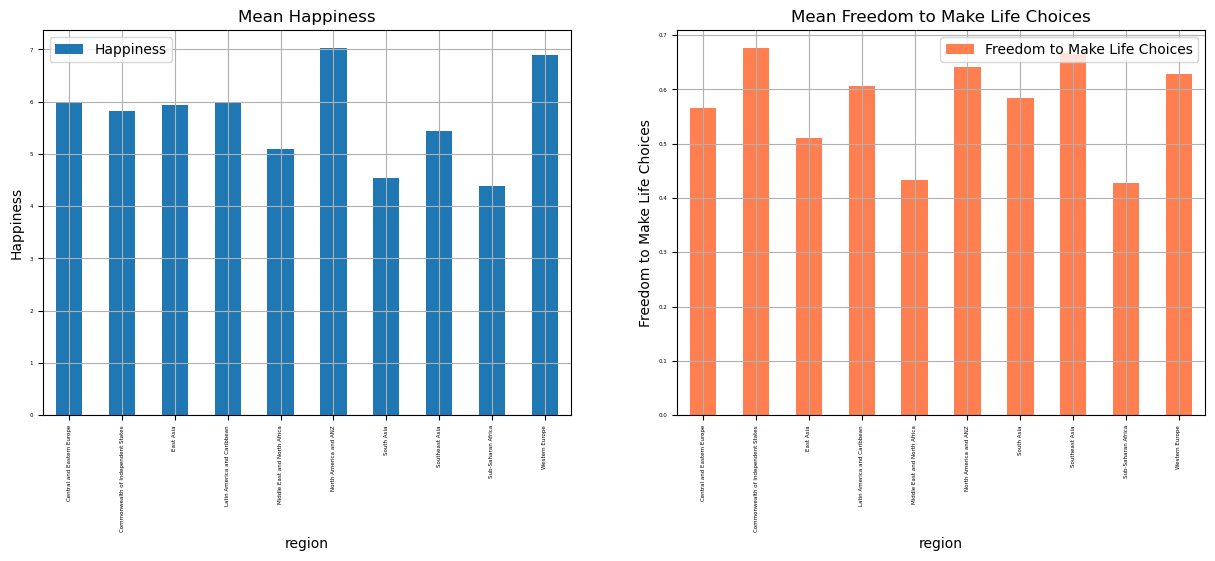

In [21]:
# 행복지수 - 삶의 선택에 있어서의 자유도 데이터 비교 시각화
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

mean_happiness_df.plot(title='Mean Happiness', x='region', y='happiness_score', \
                       fontsize=4, grid=True, ax=axes[0], ylabel="Happiness", label="Happiness", kind="bar")

mean_happiness_df.plot(title='Mean Freedom to Make Life Choices', x='region', y='freedom_to_make_life_choices', \
                       fontsize=4, grid=True, ax=axes[1], ylabel="Freedom to Make Life Choices", \
                       label="Freedom to Make Life Choices", color="coral", kind="bar")

In [22]:
# 관대함 - 비례도 낮음. 행복지수와의 연관성이 낮은 것으로 보임.
display(mean_happiness_df[['region', 'happiness_score', 'generosity']])

,region,happiness_score,generosity
0,Central and Eastern Europe,5.967091,0.137273
1,Commonwealth of Independent States,5.828250,0.183500
2,East Asia,5.930167,0.110833
3,Latin America and Caribbean,5.966053,0.109158
4,Middle East and North Africa,5.102143,0.099286
5,North America and ANZ,7.018250,0.225000
6,South Asia,4.535000,0.158000
7,Southeast Asia,5.431222,0.233778
8,Sub-Saharan Africa,4.382485,0.164727
9,Western Europe,6.894350,0.156750


<Axes: title={'center': 'Mean Generosity'}, xlabel='region', ylabel='Generosity'>

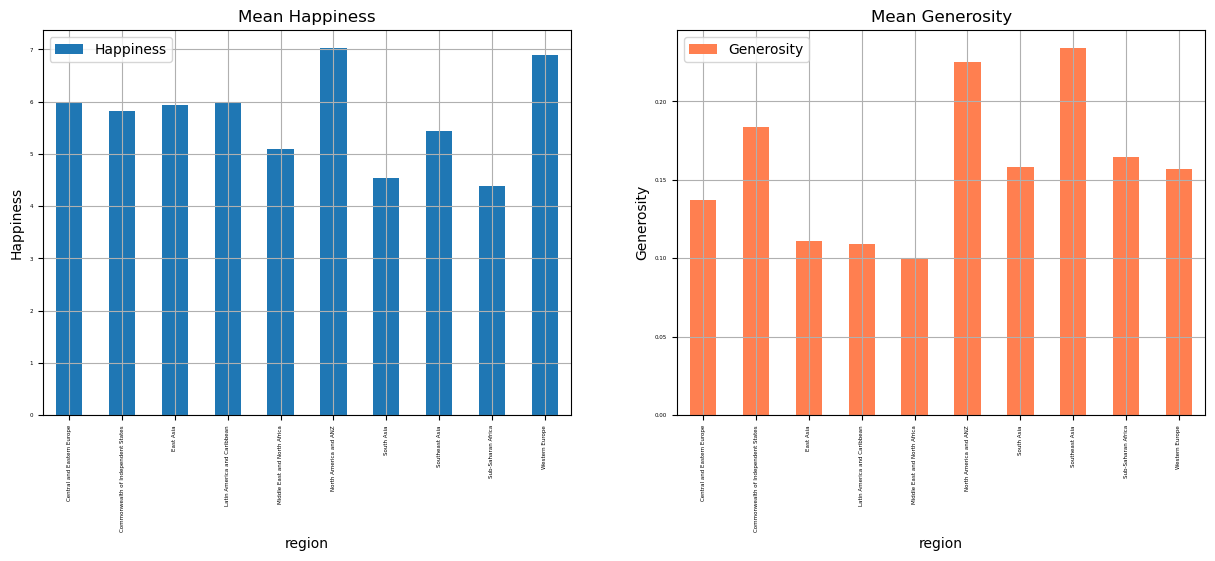

In [23]:
# 행복지수 - 관대함 데이터 비교 시각화
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

mean_happiness_df.plot(title='Mean Happiness', x='region', y='happiness_score', \
                       fontsize=4, grid=True, ax=axes[0], ylabel="Happiness", label="Happiness", kind="bar")

mean_happiness_df.plot(title='Mean Generosity', x='region', y='generosity', \
                       fontsize=4, grid=True, ax=axes[1], ylabel="Generosity", label="Generosity", color="coral", kind="bar")

In [24]:
# 국가 내 부패에 대한 인식도 - 비례도 낮음. 행복지수와의 연관성이 낮은 것으로 보임.
display(mean_happiness_df[['region', 'happiness_score', 'perceptions_of_corruption']])

,region,happiness_score,perceptions_of_corruption
0,Central and Eastern Europe,5.967091,0.076227
1,Commonwealth of Independent States,5.828250,0.166750
2,East Asia,5.930167,0.190167
3,Latin America and Caribbean,5.966053,0.104632
4,Middle East and North Africa,5.102143,0.124786
5,North America and ANZ,7.018250,0.329250
6,South Asia,4.535000,0.113600
7,Southeast Asia,5.431222,0.156000
8,Sub-Saharan Africa,4.382485,0.102697
9,Western Europe,6.894350,0.301550


<Axes: title={'center': 'Mean Perceptions of Corruption'}, xlabel='region', ylabel='Perceptions of Corruption'>

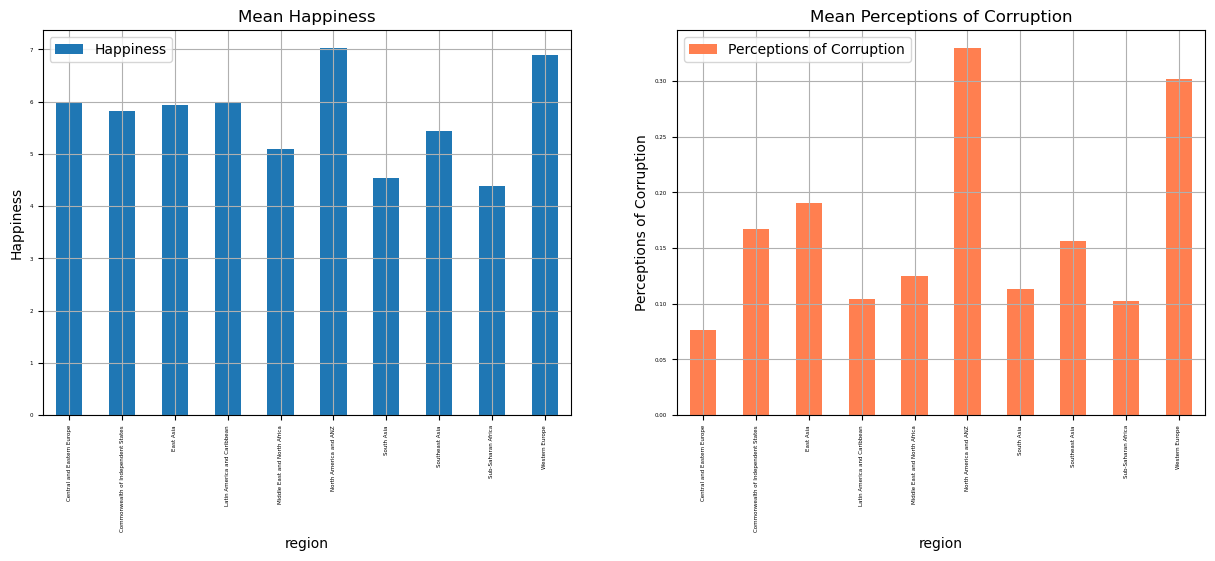

In [25]:
# 행복지수 - 국가 내 부패에 대한 인식도 데이터 비교 시각화
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

mean_happiness_df.plot(title='Mean Happiness', x='region', y='happiness_score', \
                       fontsize=4, grid=True, ax=axes[0], ylabel="Happiness", label="Happiness", kind="bar")

mean_happiness_df.plot(title='Mean Perceptions of Corruption', x='region', y='perceptions_of_corruption', \
                       fontsize=4, grid=True, ax=axes[1], ylabel="Perceptions of Corruption", \
                       label="Perceptions of Corruption", color="coral", kind="bar")

### ❤️ 2023년 행복지수 및 타 통계량의 연관성 조사 결과
- 데이터 조사 결과 행복지수와의 그래프 패턴 비례 정도가 가장 높은 feature는 개인에 대한 사회적 지지도, 즉 복지 수준으로,  
  이로 인해 복지 수준이 행복지수에 주는 영향이 크다는 것을 알 수 있었습니다.
- 행복지수가 높은 북아메리카 지역 및 서유럽 지역에서 복지 수준 역시 높게 나타났고,  
  반대로 행복지수가 낮은 남아시아 및 사하라 이남 아프리카 지역은 복지 수준 역시 낮게 나타난 것을 볼 수 있었으며,  
  그 외 나머지 지역도 행복지수와 복지 수준이 대체로 비례하는 경향이 높게 나타났습니다.
<br/><br/>
- 행복지수와의 비례 정도가 그 다음으로 높았던 feature는 GDP로,  
  이로 인해 GDP는 복지 수준 다음으로 행복지수에 주는 영향이 크다는 것을 알 수 있었습니다.
- 복지 수준과 마찬가지로 북아메리카 및 서유럽 지역은 GDP가 높게,  
  남아시아와 사하라 이남 아프리카 지역은 GDP가 낮게 나타난 것을 확인했습니다.
- 단, 아시아의 독립국가연합 지역의 경우 행복 지수는 동유럽 및 동아시아 지역과 비슷하게 나타났지만,  
  GDP는 두 지역에 비해 다소 낮게 나타난 것을 볼 수 있었는데, 원인에 대해서는 더 면밀한 조사가 필요할 것으로 보입니다.
<br/><br/>
- 반대로 행복지수와 가장 낮은 연관성을 보인 feature는 관대함과 국가 내 부패에 대한 인식도였습니다.
- 실제 그래프 패턴을 비교해보면 행복지수 그래프와의 차이가 크다는 것을 확인할 수 있고,  
  따라서 이 두 가지 요인은 행복지수에 주는 영향이 상대적으로 낮다는 결과를 도출할 수 있었습니다.

📌 이번 조사를 통해 행복한 삶을 위해서는 높은 소득과 복지 수준이 중요하다는 것을 알게 되었습니다.